In [2]:
import pandas as pd

from src.opynfield.config.user_input import UserInput
from src.opynfield.readin.run_all import run_all_track_types
from src.opynfield.config.defaults_settings import Defaults
from src.opynfield.config.cov_asymptote import CoverageAsymptote
from src.opynfield.calculate_measures.calculate_measures import tracks_to_measures
from src.opynfield.summarize_measures.summarize_individuals import individual_measures_to_dfs
from src.opynfield.summarize_measures.summarize_groups import time_average, cov_measure_average,\
    percent_coverage_average
from src.opynfield.config.model_settings import set_up_fits
from src.opynfield.fit_models.fit_individual_models import fit_all, find_fit_bounds, re_fit_all
from src.opynfield.fit_models.fit_group_models import group_fit_all
from src.opynfield.stat_test.stat_test import format_params, format_group_params, run_tests
from copy import deepcopy

In [3]:
# create your user config settings
user_config = UserInput({'Canton S': ['Buridian Tracker'], 'Canton S 2': ['Buridian Tracker']},
                        {'Canton S': 'CS1', 'Canton S 2': 'CS2'}, 4.2, 30, 1, 1, 0.001, True,
                        '/Users/ellenmcmullen/Desktop/TestRunResults')
user_config.prep_directory()
# read in the data
track_list = run_all_track_types(user_config.groups_and_types, user_config.verbose, user_config.arena_radius_cm,
                                 user_config.running_window_length, user_config.window_step_size,
                                 user_config.sample_freq, user_config.time_bin_size, user_config.trim)
# set the default parameters (or override)
test_defaults = Defaults()
# identify functional form for PICA and PGCA (or override)
test_cov_asymptote = CoverageAsymptote()
# calculate measures from track data
standard_tracks, tracks_by_groups = tracks_to_measures(track_list, user_config, test_defaults, test_cov_asymptote)
individual_measures_dfs = individual_measures_to_dfs(tracks_by_groups, test_defaults, user_config)
# calculate group averages of measures
time_averages = time_average(individual_measures_dfs, test_defaults, user_config)
group_measures_by_coverage = cov_measure_average(individual_measures_dfs, test_defaults, user_config, 'coverage')
group_measures_by_pica = cov_measure_average(individual_measures_dfs, test_defaults, user_config, 'pica')
group_measures_by_pgca = cov_measure_average(individual_measures_dfs, test_defaults, user_config, 'pgca')
group_measures_by_percent_coverage = percent_coverage_average(individual_measures_dfs, test_defaults, user_config)
# set up model fit defaults
model_params = set_up_fits()
# fit initial models on individual track data
fits = fit_all(individual_measures_dfs, test_defaults, model_params)
# change bounds based on the distribution of the parameters
fit_upper_bounds, fit_lower_bounds, fit_initial_params = find_fit_bounds(fits, user_config)
# refit the models on individual track data with the bounds
bounded_fits = re_fit_all(individual_measures_dfs, test_defaults, model_params, fit_upper_bounds, fit_lower_bounds,
                          fit_initial_params)
# fit group models with the bounds
group_fits = group_fit_all(individual_measures_dfs, test_defaults, model_params, fit_upper_bounds, fit_lower_bounds,
                           fit_initial_params)
# format the bounded_fits to do statistical tests
formatted_bounded_fits = format_params(deepcopy(bounded_fits), test_defaults, user_config)
# format the group fits to save out
formatted_group_fits = format_group_params(deepcopy(group_fits), test_defaults, user_config)
run_tests(formatted_bounded_fits, test_defaults, user_config)

['Buridian Tracker']
{'Buridian Tracker': ['Canton S', 'Canton S 2']}
Read In Buridian Tracker Files For Groups ['Canton S', 'Canton S 2']
Running Buridian Tracker Files For Group: Canton S


2023-06-07 11:19:14.113 python[11414:316139] +[CATransaction synchronize] called within transaction
2023-06-07 11:19:17.355 python[11414:316139] +[CATransaction synchronize] called within transaction


Canton S, File 1 Out Of 4
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 2 Out Of 4
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 3 Out Of 4
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 4 Out Of 4
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Running Buridian Tracker Files For Group: Canton S 2


2023-06-07 11:19:21.730 python[11414:316139] +[CATransaction synchronize] called within transaction
2023-06-07 11:19:25.098 python[11414:316139] +[CATransaction synchronize] called within transaction


Canton S 2, File 1 Out Of 3
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 2 Out Of 3
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 3 Out Of 3
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Polar Coordinates Calculated
Activity Calculated
Turning Angles Calculated
Motion Probabilities Calculated
Coverage Bins Located
Coverage Calculated
Percent Coverage Calculated
PICA Calculated
Polar Coordinates Calculated
Activity Calculated
Turning Angles Calculated
Motion Probabilities Calculated
Coverage Bins Located
Coverage Calculated
Percent Coverage Calculated
PICA Calculated
Polar Coordinates Calculated
Activity Calculated
Turning Angles Calculated
Motion Probabilities Calculated
Coverage Bins Located
Coverage Calculated
Percent Coverage Calculated
PICA 

FileExistsError: [Errno 17] File exists: '/Users/ellenmcmullen/Desktop/TestRunResults/Stats'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [ ]:
individual_measures_dfs['Canton S']['activity']

In [88]:
a =bounded_fits['Canton S']['coverage']['p_zero_zero_given_zero'].reset_index().drop(columns='index').iloc[3].values

In [91]:
np.isnan(a[0])

True

In [21]:
model_params

{'time': {'activity': ModelSpecification(axes=('time', 'activity'), model=ExponentialModel(initial_params=(0.1, -0.1, 0.01), bounds=((0, -10, 0), (10, 0, 10)), max_eval=4000)),
  'coverage': ModelSpecification(axes=('time', 'coverage'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'percent_coverage': ModelSpecification(axes=('time', 'percent_coverage'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'pica': ModelSpecification(axes=('time', 'pica'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'pgca': ModelSpecification(axes=('time', 'pgca'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'p_plus_plus': ModelSpecification(axes=('time', 'p_plus_plus'), model=ExponentialModel(initial_params=(0.1, -0.1, 0.01), bounds=((0, -10, 0), (10, 0, 10)), max_eval=4000

In [67]:
def plot_individual(i: int, x: str, y: str, group: str, measures: dict[str, dict[str, pd.DataFrame]],
                    params: dict[str, dict[str, dict[str, pd.DataFrame]]],
                    model_info: dict[str, dict[str, pd.DataFrame]]):
    y_plot = measures[group][y].iloc[i].values[1:]
    if x == 'time':
        x_plot = np.arange(0, len(y_plot))
    else:
        x_plot = measures[group][x].iloc[i].values[1:]
    plt.scatter(x_plot, y_plot)
    return

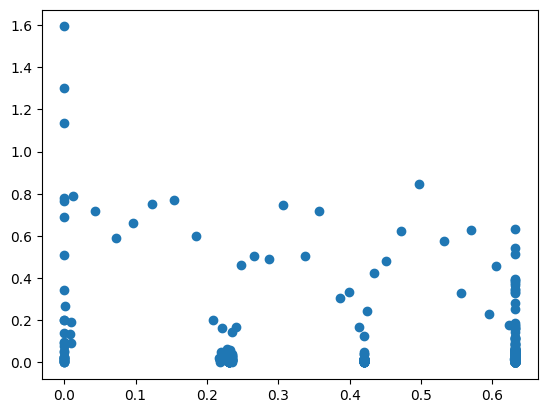

In [68]:
plot_individual(0, 'coverage', 'activity', 'Canton S', individual_measures_dfs, 1, 1)

In [77]:
type(individual_measures_dfs['Canton S']['activity'].iloc[0][1:].values)

numpy.ndarray

In [78]:
type(np.arange(len(individual_measures_dfs['Canton S']['activity'].iloc[0][1:].values)))

numpy.ndarray

In [10]:
time_averages['Canton S']['activity']

,Group,Which,0,1,2,3,4,5,6,7,...,590,591,592,593,594,595,596,597,598,599
0,Canton S,Mean,0.801998,0.816630,1.323404,0.939425,1.234074,1.087018,1.110400,1.162825,...,0.001849,0.006153,0.004274,0.004224,0.009255,0.006149,0.003055,0.002654,0.004074,0.0
0,Canton S,SEM,0.271070,0.312425,0.283395,0.480077,0.452389,0.461550,0.481253,0.374926,...,0.001713,0.002857,0.002921,0.003062,0.003462,0.002351,0.001769,0.001559,0.002417,0.0


In [8]:
time_averages['Canton S']['activity'].reset_index().drop(columns='index')

,Group,Which,0,1,2,3,4,5,6,7,...,590,591,592,593,594,595,596,597,598,599
0,Canton S,Mean,0.801998,0.816630,1.323404,0.939425,1.234074,1.087018,1.110400,1.162825,...,0.001849,0.006153,0.004274,0.004224,0.009255,0.006149,0.003055,0.002654,0.004074,0.0
1,Canton S,SEM,0.271070,0.312425,0.283395,0.480077,0.452389,0.461550,0.481253,0.374926,...,0.001713,0.002857,0.002921,0.003062,0.003462,0.002351,0.001769,0.001559,0.002417,0.0


In [11]:
time_averages['Canton S']['activity'].reset_index().drop(columns='index').iloc[0][2:]

0      0.801998
1       0.81663
2      1.323404
3      0.939425
4      1.234074
         ...   
595    0.006149
596    0.003055
597    0.002654
598    0.004074
599         0.0
Name: 0, Length: 600, dtype: object

In [18]:
group_fits['Canton S']['time']['activity'].values.shape

(3, 1)

In [25]:
group_fits['Canton S']['time']['activity'].values.flatten().tolist()

[1.2718765822885858, -0.031456246159760656, 0.03189790295546492]

In [28]:
group_measures_by_coverage['Canton S']

,activity mean,activity sem,p_plus_plus mean,p_plus_plus sem,p_plus_minus mean,p_plus_minus sem,p_plus_zero mean,p_plus_zero sem,p_zero_plus mean,p_zero_plus sem,...,p_plus_minus_given_any mean,p_plus_minus_given_any sem,p_plus_zero_given_any mean,p_plus_zero_given_any sem,p_zero_plus_given_any mean,p_zero_plus_given_any sem,p_zero_zero_given_any mean,p_zero_zero_given_any sem,coverage mean,coverage sem
0,0.465194,0.083632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000163,2.300698e-05
1,0.733468,0.179648,0.333333,0.136083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002787,3.927206e-04
2,0.302766,0.142192,0.750000,0.216506,0.250000,0.216506,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.216506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012147,4.673604e-04
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022087,4.810705e-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032088,4.809925e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.223761,0.049188,0.416667,0.082168,0.083333,0.046064,0.027778,0.027389,0.055556,0.038177,...,0.130435,0.070224,0.043478,0.042523,0.086957,0.058753,0.086957,0.058753,1.829440,3.700743e-17
241,0.003655,0.000793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.829440,3.700743e-17
242,0.004184,0.001542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.829440,3.700743e-17
243,0.001515,0.001101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.829440,3.700743e-17


In [32]:
group_measures_by_coverage['Canton S']['activity sem']

0      0.083632
1      0.179648
2      0.142192
3           NaN
4           NaN
         ...   
240    0.049188
241    0.000793
242    0.001542
243    0.001101
244    0.000000
Name: activity sem, Length: 245, dtype: float64